In [77]:
import json
import pandas as pd
import geopandas as gpd
import shapely

Json file format can be used to represent tabular data in many different ways. This sometimes creates problem when we combine several different tools.

In [52]:
json_structure1 = {
    "col1" : ["1-1", "1-2", "1-3"],
    "col2" : ["2-1", "2-2", "2-3"],
    "col3" : ["text", {"key": "value"}, [0]]
}
json_structure1

{'col1': ['1-1', '1-2', '1-3'],
 'col2': ['2-1', '2-2', '2-3'],
 'col3': ['text', {'key': 'value'}, [0]]}

In [60]:
df = pd.DataFrame(json_structure1)
df

,col1,col2,col3
0,1-1,2-1,text
1,1-2,2-2,{'key': 'value'}
2,1-3,2-3,[0]


In [61]:
json_structure2 = eval(df.to_json())
json_structure2

{'col1': {'0': '1-1', '1': '1-2', '2': '1-3'},
 'col2': {'0': '2-1', '1': '2-2', '2': '2-3'},
 'col3': {'0': 'text', '1': {'key': 'value'}, '2': [0]}}

In [62]:
json_structure3 = eval(df.to_json(orient = "records"))
json_structure3

[{'col1': '1-1', 'col2': '2-1', 'col3': 'text'},
 {'col1': '1-2', 'col2': '2-2', 'col3': {'key': 'value'}},
 {'col1': '1-3', 'col2': '2-3', 'col3': [0]}]

In [80]:
df["coordinates"] = [[0,1], [1,2], [3,4]]
df

,col1,col2,col3,coordinates
0,1-1,2-1,text,"[0, 1]"
1,1-2,2-2,{'key': 'value'},"[1, 2]"
2,1-3,2-3,[0],"[3, 4]"


In [81]:
eval(df.to_json(orient = "records"))

[{'col1': '1-1', 'col2': '2-1', 'col3': 'text', 'coordinates': [0, 1]},
 {'col1': '1-2',
  'col2': '2-2',
  'col3': {'key': 'value'},
  'coordinates': [1, 2]},
 {'col1': '1-3', 'col2': '2-3', 'col3': [0], 'coordinates': [3, 4]}]

In [83]:
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf["coordinates"].apply(lambda x: x[0]), gdf["coordinates"].apply(lambda x: x[1])), crs={"init": "epsg:3857"})
gdf

/home/kasev/social_diversity/socdiv_venv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,col1,col2,geometry,coordinates
0,1-1,2-1,POINT (0.00000 1.00000),"[0, 1]"
1,1-2,2-2,POINT (1.00000 2.00000),"[1, 2]"
2,1-3,2-3,POINT (3.00000 4.00000),"[3, 4]"


<AxesSubplot:>

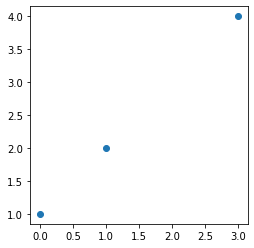

In [58]:
gdf.plot()

In [70]:
eval(gdf.to_json())

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'col1': '1-1', 'col2': '2-1', 'coordinates': [0, 1]},
   'geometry': {'type': 'Point', 'coordinates': [0.0, 1.0]}},
  {'id': '1',
   'type': 'Feature',
   'properties': {'col1': '1-2', 'col2': '2-2', 'coordinates': [1, 2]},
   'geometry': {'type': 'Point', 'coordinates': [1.0, 2.0]}},
  {'id': '2',
   'type': 'Feature',
   'properties': {'col1': '1-3', 'col2': '2-3', 'coordinates': [3, 4]},
   'geometry': {'type': 'Point', 'coordinates': [3.0, 4.0]}}]}

In [78]:
def gdf_to_geojson(gdf_input):
    # serialize geometry:
    gdf = gdf_input.copy()
    gdf["geometry"] = gdf["geometry"].apply(lambda x: eval(json.dumps(shapely.geometry.mapping(x))))
    # gdf into dict object in geojson structure:
    for col in gdf.columns:
        if list in [type(ins) for ins in gdf[col]]:
            gdf[col] = gdf[col].apply(lambda x: str(x))
    dict_list_object = [{"type" : "Feature", "geometry" : el["geometry"], "properties": {key:val for key, val in el.items() if key != 'geometry'}} for el in gdf.to_dict("records")]
    geojson_structure = {"type": "FeatureCollection", "features": dict_list_object}
    return geojson_structure

In [79]:
gdf_to_geojson(gdf)

/home/kasev/social_diversity/socdiv_venv/lib/python3.6/site-packages/geopandas/geodataframe.py:1321: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [0.0, 1.0]},
   'properties': {'col1': '1-1', 'col2': '2-1', 'coordinates': '[0, 1]'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [1.0, 2.0]},
   'properties': {'col1': '1-2', 'col2': '2-2', 'coordinates': '[1, 2]'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [3.0, 4.0]},
   'properties': {'col1': '1-3', 'col2': '2-3', 'coordinates': '[3, 4]'}}]}

In [87]:
eval("print('hello')")

hello
